<a href="https://colab.research.google.com/github/CleberSalustiano/MachineLearning_Anaemic/blob/main/MachineLearning_clebersalustiano.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

from sklearn.metrics import accuracy_score, mean_squared_error

In [9]:
data = pd.read_csv('anemia_dataset.csv')

data.keys()

Index(['Number', 'Name', '%Red Pixel', '%Green pixel', '%Blue pixel', 'Hb',
       'Anaemic', 'Unnamed: 7'],
      dtype='object')

# Regressão linear

In [11]:
X = data['%Red Pixel'].values.reshape(-1,1)
y = data['%Green pixel'].values

In [12]:
from sklearn.linear_model import LinearRegression

linearRegression = LinearRegression()
linearRegression.fit(X, y)
ypred = linearRegression.predict(X)
mean_squared_error(y, ypred)

1.1105514562898937

Raiz do Erro Quadrático Médio (RMSE): 1.1105514562898937


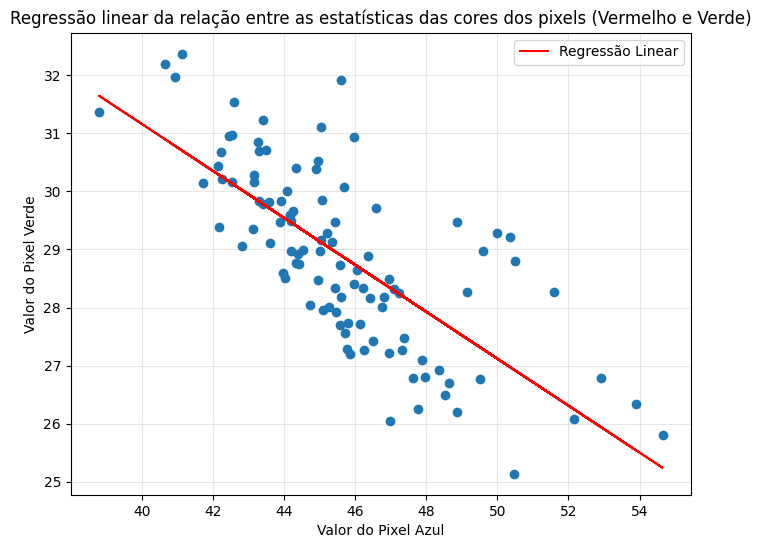

In [13]:
print(f"Raiz do Erro Quadrático Médio (RMSE): {mean_squared_error(y,ypred)}")
plt.figure(figsize=(8,6))
plt.scatter(X, y, zorder=2)
plt.title("Regressão linear da relação entre as estatísticas das cores dos pixels (Vermelho e Verde)")
plt.xlabel("Valor do Pixel Azul")
plt.ylabel("Valor do Pixel Verde")
plt.plot(X, ypred, 'r', label="Regressão Linear")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Classificador Linear

In [14]:
from sklearn.linear_model import LogisticRegression

X = data['Hb'].values.reshape(-1,1)
y = [1 if value == "Yes" else 0 for value in data['Anaemic']]


logisticRegression = LogisticRegression()
logisticRegression.fit(X, y)
ypred = logisticRegression.predict(X)
accuracy_score(y, ypred)

0.9807692307692307

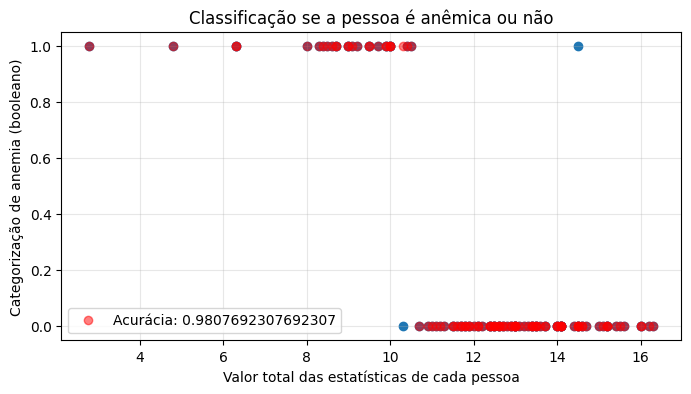

In [15]:
plt.figure(figsize=(8,4))
plt.scatter(X, y)
plt.xlabel("Valor total das estatísticas de cada pessoa")
plt.ylabel("Categorização de anemia (booleano)")
plt.plot(X, ypred,'ro', label=f"Acurácia: {accuracy_score(y, ypred)}", alpha=0.5, zorder=2)
plt.title("Classificação se a pessoa é anêmica ou não")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# KNN

In [ ]:
X = data[['%Red Pixel', '%Blue pixel']].values
y = data['Anaemic'].values

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)
ypred = knn.predict(X)
accuracy_score(y, ypred)

0.9038461538461539

In [ ]:
from matplotlib.colors import ListedColormap


def plot_knc(model, X, y, xlim='X1', ylim='X2'):
  ypred = model.predict(X)
  accuracy = accuracy_score(y, ypred)

  cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
  cmap_bold = ['darkorange', 'c', 'darkblue']

  mesh_step_size = .1
  plot_symbol_size = 50

  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                      np.arange(y_min, y_max, mesh_step_size))
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  plt.figure()
  unique_classes = np.unique(y)
  class_to_number = {original: number for number, original in enumerate(unique_classes)}
  class_to_color = {original: color for original, color in zip(unique_classes, cmap_bold)}

  Z_num = np.array([class_to_number[class_name] for class_name in Z.ravel()])
  Z_num = Z_num.reshape(Z.shape)
  plt.pcolormesh(xx, yy, Z_num, cmap=cmap_light)

  for stage in unique_classes:
    plt.scatter(X[y == stage][: ,0],
                X[y == stage][: ,1],
                s=plot_symbol_size,
                c=class_to_color[stage],
                label=str(stage),
                edgecolor='black')

  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  plt.xlabel(xlim)
  plt.ylabel(ylim)
  plt.legend()
  plt.show()
  return accuracy

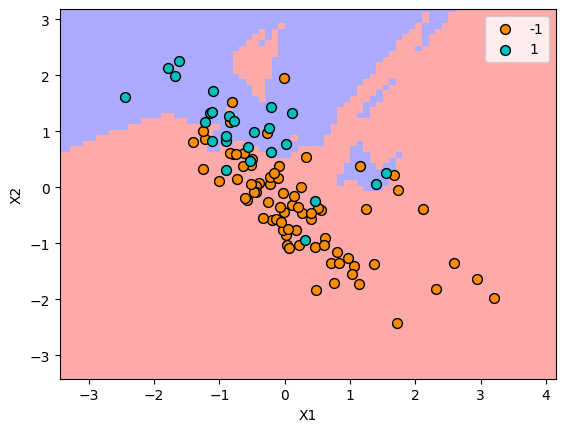

0.9038461538461539

In [ ]:
plot_knc(knn, X, y)

# Arvore de Decisão

In [5]:
X = data[['Hb', '%Red Pixel', '%Green pixel', '%Blue pixel']]
y = [1 if value == "Yes" else 0 for value in data['Anaemic']]

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
scale = StandardScaler()
X = scale.fit_transform(X)


decisionTree = DecisionTreeClassifier()
decisionTree.fit(X, y)
ypred = decisionTree.predict(X)
accuracy_score(y, ypred)

1.0

In [8]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image, display
import pydotplus

def plot_tree(tree, image_name, feature_names=None, class_names=None):
  dot_data = StringIO()
  export_graphviz(tree, out_file=dot_data,
                  filled=True, rounded=True,
                  special_characters=True,
                  feature_names=feature_names,
                  class_names=class_names)

  graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
  graph.set_size('"200,200!"')
  graph.write_png(f'{image_name}.png')
  image = Image(graph.create_png())

  display(image)

plot_tree(decisionTree, "arvore_decisao")

# KMeans

In [16]:
X = data[['%Red Pixel', '%Green pixel']].values
y = data['Anaemic'].values

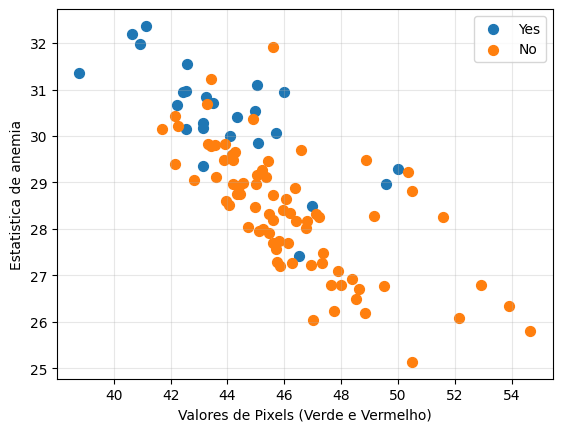

In [17]:
for stage in set(y):
    plt.scatter(X[y == stage, 0], X[y == stage, 1], s=50, label=f'{stage}')
plt.xlabel('Valores de Pixels (Verde e Vermelho)')
plt.ylabel('Estatistica de anemia')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

In [18]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, n_init=100)
kmeans.fit(X)
ypred = kmeans.predict(X)

In [19]:
def plot_kmeans(kmeans, X, y, feature_names, ypred_named, xlabel='X1',ylabel='X2'):
  plt.figure(figsize=(8,6))

  colors_real = ['orange', 'blue']
  colors_pred = ['darkorange', 'darkblue']

  for idx, feature in enumerate(feature_names):
    plt.scatter(X[y == feature, 0], X[y == feature, 1], s=100, label=f'{feature}', marker='s', color=colors_real[idx])

  plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker="x", color="r", s=150, linewidths=7, label="Centroids")

  for idx, feature in enumerate(feature_names):
    plt.plot(X[ypred_named == feature, 0], X[ypred_named == feature, 1], ".", markersize=10, color=colors_pred[idx])

  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.legend()
  plt.show()

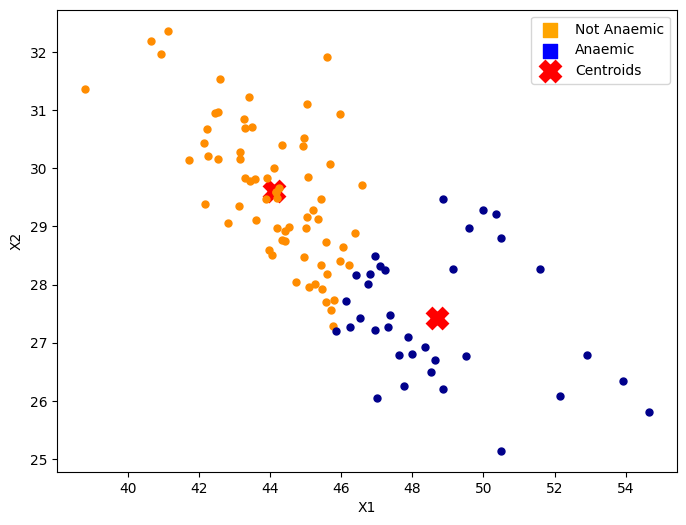

In [20]:
ypred_n = np.array([])
stage_names = ["Not Anaemic", "Anaemic"]
for i in range(len(ypred)):
  ypred_n = np.append(ypred_n, stage_names[int(ypred[i])])

plot_kmeans(kmeans, X, y, stage_names, ypred_n)

# MLP Classifier

In [21]:
def plot_dataset(X, y, label_map, alpha=0.3):
  for label in label_map:
    plt.scatter(X[y == label, 0], X[y == label, 1], s=50, label=label_map[label])

  plt.xlabel('Valores de Pixels (Verde e Vermelho)')
  plt.ylabel('Estatistica de anemia')
  plt.grid(alpha)
  plt.legend()

def define_axes(X):
  offset = 0.5
  min1, max1 = X[:, 0].min(), X[:, 0].max()
  min2, max2 = X[:, 1].min(), X[:, 1].max()
  return [min1-offset, max1+offset, min2-offset, max2+offset]

def plot_mlpclassifier(clf, X):
  axes = define_axes(X)
  x0s = np.linspace(axes[0], axes[1], 100)
  x1s = np.linspace(axes[2], axes[3], 100)
  x0, x1 = np.meshgrid(x0s, x1s)
  X = np.c_[x0.ravel(), x1.ravel()]
  y_pred = clf.predict(X).reshape(x0.shape)
  plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)

In [22]:
X = data[['%Red Pixel', '%Green pixel']].values
scale = StandardScaler()
X = scale.fit_transform(X)
y = [1 if value == "Yes" else -1 for value in data['Anaemic']]
y = np.array(y)

0.9903846153846154


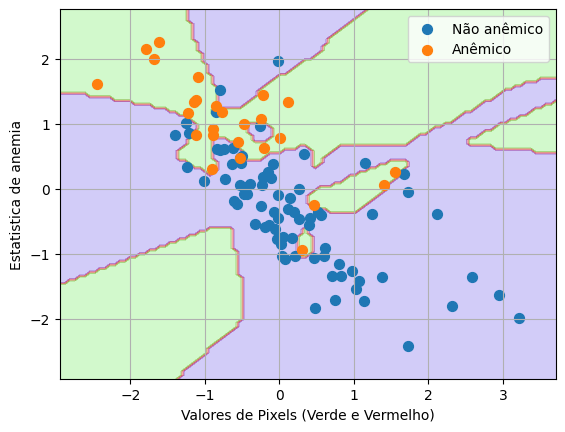

In [23]:
from sklearn.neural_network import MLPClassifier

mlpclassifier = MLPClassifier(hidden_layer_sizes=[30], max_iter=1000, learning_rate_init=0.1, activation='tanh')
mlpclassifier.fit(X, y)
ypred = mlpclassifier.predict(X)
print(accuracy_score(y, ypred))

plot_mlpclassifier(mlpclassifier, X)
plot_dataset(X,y, label_map = {-1: 'Não anêmico', 1: 'Anêmico'}, alpha=1)

# Ensemble

In [ ]:
X = data[['%Red Pixel', '%Green pixel']].values
y = [1 if value == "Yes" else 0 for value in data['Anaemic']]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.333, random_state=42)

In [ ]:
models_in_voting = [MLPClassifier(hidden_layer_sizes=[30], max_iter=1000, learning_rate_init=0.1, activation='tanh'),
                    KNeighborsClassifier(n_neighbors=7),
                    DecisionTreeClassifier()]


models_v_accuracy = []
for model in models_in_voting:
  model.fit(X_train, y_train)
  ypred = model.predict(X_test)
  models_v_accuracy.append(accuracy_score(y_test, ypred))


for i, acc in enumerate(models_v_accuracy):
  print(f'{models_in_voting[i]}: {acc:.3f}')

MLPClassifier(activation='tanh', hidden_layer_sizes=[30],
              learning_rate_init=0.1, max_iter=1000): 0.829
KNeighborsClassifier(n_neighbors=7): 0.857
DecisionTreeClassifier(): 0.829


In [ ]:
from sklearn.ensemble import VotingClassifier

votingclassifier = VotingClassifier([
  ('MPLClassifier', MLPClassifier(hidden_layer_sizes=[30], max_iter=1000, learning_rate_init=0.1, activation='tanh')),
  ('knc', KNeighborsClassifier(n_neighbors=7)),
  ('treeclassifier', DecisionTreeClassifier())
])

In [ ]:
votingclassifier.fit(X_train, y_train)
voting_pred = votingclassifier.predict(X_test)
print(f'Acurácia:{accuracy_score(y_test, voting_pred):.3f}')

Acurácia:0.857
